In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
full_df=pd.read_csv("C:/Users/Maniv/Downloads/train_data.csv/train_data.csv")
train_df = full_df.sample(n=int(0.2*full_df.shape[0]))
labels_train = pd.read_csv("C:/Users/Maniv/Downloads/train_labels.csv/train_labels.csv")
lables_df = labels_train.sample(n=int(0.2*labels_train.shape[0]))
df2 = pd.merge(train_df, lables_df, on=["customer_ID"])
df2.to_csv('merge_df.csv')
print(df2.columns)

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)


In [4]:
df2.shape

(221664, 191)

   Category  Observations  Default_rate
0         1             1         18122
1         2             1         23557
2         3             1         20845
3         4             1         12761
4         5             1          5575
5         6             1          1856
6         7             1           429
7         8             1            94
8         9             1             7
9        10             1             2


In [6]:
import pandas as pd

# Let's assume 'df' is your DataFrame and it has columns 'customer_ID', 'Date' and 'target'

# Convert your 'Date' column to datetime if it's not already
df2['S_2'] = pd.to_datetime(df2['S_2'])

# Extract year and month to a new column 'YearMonth'
df2['YearMonth'] = df2['S_2'].dt.strftime('%Y-%m')  # This will give you 'YearMonth' as a string in the format '2022-07'

# Group by 'customer_ID' and 'YearMonth', then aggregate by the count of unique months and mean of 'target'
customer_data = df2.groupby('customer_ID').agg(Num_Months=('YearMonth', 'nunique'), DefaultRate=('target', 'mean')).reset_index()

# Then group by 'Num_Months' to get the count of customers and average default rate for each month from 1 to 13
output_df = customer_data.groupby('Num_Months').agg(Observations=('customer_ID', 'count'), DefaultRate=('DefaultRate', 'mean')).reset_index()

# Filter rows where 'Num_Months' is from 1 to 13
output_df = output_df[output_df['Num_Months'].between(1, 14)]

# Print the DataFrame
print(output_df)


   Num_Months  Observations  DefaultRate
0           1         18122     0.277398
1           2         23557     0.254362
2           3         20845     0.242936
3           4         12761     0.240890
4           5          5575     0.229058
5           6          1856     0.246228
6           7           429     0.223776
7           8            94     0.159574
8           9             7     0.428571
9          10             2     0.500000


In [6]:
df2.tail(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,Year_Month,YearMonth
222166,6b5ea1be38dffa2387ec3902a038dadd71ee10488b59bd...,2017-05-04,0.511135,0.007450,0.190456,0.123947,0.007162,0.216107,0.000061,0.613278,...,0.006721,0.009317,0.007271,NaN,0.008040,0.004190,0.001021,0,201705,2017-05
222167,984683ba0c32599624d2a89f3ff7f4e39f08f40374e54a...,2017-07-26,0.825972,0.708159,0.037291,1.004942,0.006496,0.097546,0.001472,0.078291,...,0.001755,0.004961,0.006999,NaN,0.001466,0.005541,0.007933,0,201707,2017-07
222168,2347dba4f7604fb3a9e2ee0d50e12f1ad8a5f7374f8ad9...,2017-07-05,0.685447,0.002402,0.023493,1.006714,0.009996,0.070889,0.001908,0.021758,...,1.004771,0.000862,0.944171,0.41417,1.008546,1.017530,0.184986,0,201707,2017-07
222169,6de5c633221996e5d9a9b9b472f10554ceabac87ed81c6...,2018-03-28,0.230397,0.912472,1.315630,0.029049,0.509715,NaN,1.433258,0.977665,...,0.009413,0.008947,0.005267,NaN,0.000361,0.008141,0.001548,1,201803,2018-03
222170,266d6718c17255da13908cfc473fbb99fb20799747e6df...,2018-01-25,0.139322,0.882720,0.268337,0.045105,0.502146,0.796539,0.005174,0.233815,...,0.009626,0.005177,0.009657,NaN,0.000801,0.001789,0.001229,1,201801,2018-01


In [7]:
mean_columns = [col for col in df2.columns if col not in ['customer_ID', 'S_2']]

import pandas as pd

# Convert the 'S_2' column to datetime
df2['S_2'] = pd.to_datetime(df2['S_2'])

# Define the last date in your data and calculate 6 months prior to this date
last_date = df2['S_2'].max()
six_months_ago = last_date - pd.DateOffset(months=6)

# Filter your data for the last 6 months
df2_last_6_months = df2[(df2['S_2'] > six_months_ago) & (df2['S_2'] <= last_date)]
#print(df2_last_6_months)
# Calculate the average spend for each customer over the last 6 months
# Exclude 'customer_ID' and 'S_2' from the columns to calculate the mean
mean_columns = [col for col in df2.columns if col not in ['customer_ID', 'S_2']]
#print(mean_columns)
average_spend_last_6_months = df2_last_6_months.groupby('customer_ID')
average_spend_last_6_months=average_spend_last_6_months.mean([mean_columns])

In [8]:
average_spend_last_6_months

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.855992,0.001725,0.004354,0.817181,0.008392,NaN,0.004832,0.005624,NaN,NaN,...,NaN,NaN,0.007085,0.006233,0.001597,NaN,0.006436,0.004067,0.006169,0.0
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e,0.255796,0.007591,0.208633,1.004648,1.003797,0.175447,0.009316,0.004711,0.048749,NaN,...,NaN,NaN,1.005313,0.004475,0.876428,0.051367,1.005640,0.001958,0.094792,1.0
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,0.219733,0.077310,0.103681,0.056357,0.501730,0.486857,0.083809,0.278840,NaN,0.130627,...,NaN,NaN,0.006597,0.006791,0.005968,NaN,0.006597,0.009337,0.003622,1.0
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,0.934098,0.037824,0.032662,0.939220,0.005951,0.394320,0.003685,0.021585,NaN,0.111558,...,NaN,NaN,0.003872,0.001909,0.007020,NaN,0.006231,0.005610,0.005501,0.0
0004e00358fc4dd633e491c8090a0794b6165ed9a7e60c02bdab9ac745f661c2,1.005934,0.196518,0.029641,1.009244,0.005535,0.080714,0.008605,0.001888,NaN,NaN,...,NaN,NaN,0.007852,0.007000,0.006471,NaN,0.008658,0.005050,0.004091,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb8cb2a4375ee042827ce1e880268ca33b1091bb6811ae06f300fd6514a66b,0.838089,0.009430,0.132516,0.163360,0.508618,0.500673,0.006695,0.067462,NaN,NaN,...,NaN,NaN,0.006830,0.006933,0.005383,NaN,0.007779,0.004144,0.003318,0.0
fffdc3a28b2d17b4136b18ab6a554ccb3d98ec3a9305a0a64255dc7cf8711b40,0.668329,0.005005,0.009436,0.819893,0.003981,0.349480,0.004249,0.000955,0.021880,NaN,...,NaN,NaN,0.004035,0.000464,0.009873,NaN,0.006768,0.008062,0.005868,0.0
fffe39594fad367d9eb8ae18537b56b0739c4cc3ab9810f8642d49ec45e60c62,0.147580,0.005344,0.217875,0.039366,0.379329,0.289669,0.008081,0.528062,NaN,0.366920,...,NaN,NaN,0.009038,0.005126,0.006804,NaN,0.006962,0.006913,0.007584,1.0


In [9]:
df2.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,Year_Month,YearMonth
0,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2018-01-10,0.498904,0.709402,0.189587,0.192518,0.504092,0.181057,0.557602,0.570918,...,0.008238,0.007714,0.000978,NaN,0.009708,0.006568,0.006127,1,201801,2018-01
1,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2017-03-13,0.612603,0.799085,0.069171,0.042624,0.006659,0.361654,0.586900,0.532736,...,0.008031,0.006911,0.002954,NaN,0.003433,0.001559,0.008950,1,201703,2017-03
2,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2017-09-15,0.806127,0.857513,0.072347,0.817833,0.007531,0.169587,0.754331,0.301728,...,0.003094,0.003507,0.006067,NaN,0.006555,0.006414,0.008785,1,201709,2017-09
3,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2017-05-22,0.727005,1.121381,0.333463,0.009356,0.255823,0.164125,0.925804,0.387720,...,0.006047,0.008102,0.002732,NaN,0.004846,0.009195,0.000024,1,201705,2017-05
4,3fb0baf28cd4665064c74b515487bc43ab353360d443d2...,2018-01-21,0.235562,0.004269,0.181849,0.035351,0.001030,0.153071,0.005892,0.377545,...,0.007809,0.008892,0.001610,NaN,0.005756,0.007210,0.001162,1,201801,2018-01


In [10]:
missing_percent = (df2.isnull().sum() / len(df2)) * 100
missing_percent

customer_ID    0.000000
S_2            0.000000
P_2            0.786331
D_39           0.000000
B_1            0.000000
                 ...   
D_144          0.725567
D_145          1.812118
target         0.000000
Year_Month     0.000000
YearMonth      0.000000
Length: 193, dtype: float64

In [11]:
columns_to_drop = missing_percent[missing_percent > 95].index

In [12]:
df2.drop(columns=columns_to_drop, inplace=True)

In [13]:
import pandas as pd

# Assuming you have a DataFrame called df with 11 columns to encode

# Specify the columns to one-hot encode
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Perform one-hot encoding
df = pd.get_dummies(df2, columns=columns_to_encode)

df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2018-01-10,0.498904,0.709402,0.189587,0.192518,0.504092,0.181057,0.557602,0.570918,...,False,False,False,False,False,False,False,False,False,True
1,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2017-03-13,0.612603,0.799085,0.069171,0.042624,0.006659,0.361654,0.586900,0.532736,...,True,False,False,False,False,False,False,False,False,True
2,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2017-09-15,0.806127,0.857513,0.072347,0.817833,0.007531,0.169587,0.754331,0.301728,...,True,False,False,False,False,False,False,False,False,True
3,ce104d51cb4b141f0a4a8fc78b99de6246da712f660535...,2017-05-22,0.727005,1.121381,0.333463,0.009356,0.255823,0.164125,0.925804,0.387720,...,True,False,False,False,False,False,False,False,False,True
4,3fb0baf28cd4665064c74b515487bc43ab353360d443d2...,2018-01-21,0.235562,0.004269,0.181849,0.035351,0.001030,0.153071,0.005892,0.377545,...,True,False,False,False,False,False,False,True,False,False


In [14]:
# put 30% in test. This is a random split which is not ideal. Ideally we would like to split based on another variable, for example time. 
# Note that both test and train should be unbiased samples of the whole population.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [15]:
# check
train.shape

(155519, 214)

In [16]:
test1, test2 = train_test_split(test, test_size=0.5)

In [17]:
test1.shape

(33326, 214)

In [18]:
test2.shape

(33326, 214)

In [19]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different. 
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(train["target"])/len(train["target"]))
print (sum(test1["target"])/len(test1["target"]))
print (sum(test2["target"])/len(test2["target"]))

0.24688301750911465
0.2486947128368241
0.24875472603972873


In [20]:
# Define X and Y varibales to build the ensemble model. 
X_train = train.drop(["customer_ID",'S_2', 'target','Year_Month','YearMonth'], axis = 1)
Y_train = train['target']

X_test1 = test1.drop(["customer_ID","S_2", 'target','Year_Month','YearMonth'], axis = 1)
Y_test1 = test1['target']
X_test2 = test2.drop(["customer_ID",'S_2','target','Year_Month','YearMonth'], axis = 1)
Y_test2 = test2['target']

In [21]:
print("X_test1 shape: ", X_test1.shape)
print("Y_test1 shape: ", Y_test1.shape)

X_test1 shape:  (33326, 209)
Y_test1 shape:  (33326,)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [23]:
X_train_normalized = sc.transform(X_train)
X_test1_normalized = sc.transform(X_test1)
X_test2_normalized = sc.transform(X_test2)

In [24]:
# convert to Pandas DF
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [25]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,154282.0,-1.399606e-16,1.000003,-4.198348,-2.652804,0.157766,1.423264,1.439610
D_39,155519.0,-1.574425e-16,1.000003,-0.566693,-0.566028,-0.532964,3.178734,18.563549
B_1,155519.0,3.152505e-17,1.000003,-36.348405,-0.581668,-0.437678,4.078139,5.655889
B_2,155469.0,-8.466514e-17,1.000003,-1.551039,-1.543945,0.479028,0.965893,0.966666
R_1,155519.0,6.725345e-17,1.000003,-0.346780,-0.346270,-0.321284,4.104184,11.823949
...,...,...,...,...,...,...,...,...
D_68_2.0,155519.0,8.310735e-17,1.000003,-0.203957,-0.203957,-0.203957,4.902987,4.902987
D_68_3.0,155519.0,-2.078826e-18,1.000003,-0.310236,-0.310236,-0.310236,3.223352,3.223352
D_68_4.0,155519.0,-6.903530e-17,1.000003,-0.307889,-0.307889,-0.307889,3.247924,3.247924
D_68_5.0,155519.0,1.416343e-17,1.000003,-0.528097,-0.528097,-0.528097,1.893591,1.893591


In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a function to cap and floor values
def cap_floor_values(df, lower_percentile, upper_percentile):
    for col in df.columns:
       # lower_value = df[col].quantile(lower_percentile)
        #upper_value = df[col].quantile(upper_percentile)
        #df[col] = np.where(df[col] < lower_value, lower_value, df[col])
        #df[col] = np.where(df[col] > upper_value, upper_value, df[col])
        df = df.map(lambda x: min(upper_percentile, max(lower_percentile, x)))
    return df

# Apply cap and floor on train set
X_train_normalized = cap_floor_values(X_train, 0.01, 0.99)

# Replace missing values with 0 in train set
X_train_normalized = X_train_normalized.fillna(0)

# Initialize the scaler based on the train set (after capping/flooring and filling NA)
scaler = StandardScaler().fit(X_train_normalized)

# Standardize the train set
X_train_normalized = scaler.transform(X_train_normalized)

# Apply the same transformations to the test sets
X_test1_normalized = cap_floor_values(X_test1, 0.01, 0.99)
X_test1_normalized = X_test1_normalized.fillna(0)
X_test1_normalized = scaler.transform(X_test1_normalized)

X_test2_normalized = cap_floor_values(X_test2, 0.01, 0.99)
X_test2_normalized = X_test2_normalized.fillna(0)
X_test2_normalized = scaler.transform(X_test2_normalized)



In [27]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [28]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,155519.0,-6.830428e-17,1.000003,-2.603539,-2.603539,0.162742,1.362108,1.362108
D_39,155519.0,4.363250e-17,1.000003,-0.599421,-0.599421,-0.599421,3.659891,3.659891
B_1,155519.0,1.386645e-16,1.000003,-0.561439,-0.561439,-0.457489,4.273875,4.277540
B_2,155519.0,-2.016004e-16,1.000003,-1.532309,-1.532309,0.497386,0.940540,0.940540
R_1,155519.0,1.308518e-16,1.000003,-0.342583,-0.342583,-0.342583,4.563200,4.563200
...,...,...,...,...,...,...,...,...
D_68_2.0,155519.0,5.080559e-17,1.000003,-0.203957,-0.203957,-0.203957,4.902987,4.902987
D_68_3.0,155519.0,5.779593e-17,1.000003,-0.310236,-0.310236,-0.310236,3.223352,3.223352
D_68_4.0,155519.0,-1.331819e-17,1.000003,-0.307889,-0.307889,-0.307889,3.247924,3.247924
D_68_5.0,155519.0,3.500652e-16,1.000003,-0.528097,-0.528097,-0.528097,1.893591,1.893591


In [29]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import xgboost as xgb

In [31]:
xgb_instance = xgb.XGBClassifier()

In [32]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train_normalized,Y_train)
model_for_feature_selection

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
feature_importance = {'Feature':X_train_normalized.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
0,P_2,0.201505
2,B_1,0.050225
24,B_9,0.025736
8,D_42,0.019860
7,B_3,0.015891
...,...,...
165,B_30_1.0,0.000000
166,B_30_2.0,0.000000
172,B_38_6.0,0.000000
34,R_4,0.000000


In [34]:
# choose featires with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train_normalized[final_features]
X1_test1 = X_test1_normalized[final_features]
X1_test2 = X_test2_normalized[final_features]
final_features

0           P_2
2           B_1
24          B_9
8          D_42
7           B_3
4           R_1
168    B_38_2.0
14          R_2
70         D_75
10         D_44
17         D_48
23         D_51
136       D_112
170    B_38_4.0
5           S_3
6          D_41
12         D_45
134        R_27
78         D_79
201    D_66_1.0
18         D_49
9          D_43
191     D_63_CO
22         D_50
133        R_26
3           B_2
131        B_36
11          B_4
89         R_12
72         B_24
152       D_130
197      D_64_O
25          R_3
54         B_18
148       D_127
52         B_16
74         D_77
31         B_11
192     D_63_CR
Name: Feature, dtype: object

In [35]:
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model.fit(X_train_normalized, Y_train)

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
##feature_importance = model.feature_importances_

s_feature_importance = {'Feature':X_train_normalized.columns,'Importance':model.feature_importances_}
s_feature_importance = pd.DataFrame(s_feature_importance)
s_feature_importance.sort_values("Importance", inplace=True,ascending=False)
s_feature_importance

,Feature,Importance
0,P_2,0.120963
21,B_8,0.103412
17,D_48,0.046713
132,B_37,0.032162
24,B_9,0.026148
...,...,...
187,D_126_-1.0,0.000000
186,D_120_1.0,0.000000
86,D_81,0.000000
111,R_22,0.000000


In [37]:
final_features_1 = s_feature_importance["Feature"][s_feature_importance.Importance > 0.005]

X2_train = X_train_normalized[final_features_1]
X2_test1 = X_test1_normalized[final_features_1]
X2_test2 = X_test2_normalized[final_features_1]
final_features_1


0           P_2
21          B_8
17         D_48
132        B_37
24          B_9
8          D_42
20          B_7
7           B_3
136       D_112
70         D_75
74         D_77
5           S_3
6          D_41
4           R_1
78         D_79
12         D_45
10         D_44
9          D_43
14          R_2
169    B_38_3.0
133        R_26
25          R_3
22         D_50
201    D_66_1.0
29         D_53
35          S_7
23         D_51
204    D_68_2.0
33         D_54
13          B_5
Name: Feature, dtype: object

In [38]:
merged_feature_importance = pd.concat([feature_importance, s_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train_normalized[filtered_features]
X3_test1 = X_test1_normalized[filtered_features]
X3_test2 = X_test2_normalized[filtered_features]


In [39]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
pip install keras

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score

def create_model(num_hidden_layers, num_nodes, activation_fn, dropout_rate):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=X3_train.shape[1], activation=activation_fn))  # first layer needs input dimension

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_nodes, activation=activation_fn))
        if dropout_rate < 1.0:
            model.add(Dropout(1-dropout_rate))  # Dropout rate in keras is the fraction to drop

    model.add(Dense(units=1, activation='sigmoid'))  # Output layer

    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

    return model

# empty list to hold results
results = []

# grid search parameters
num_layers = [2, 4]
num_nodes = [4, 6]
activations = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]
batch_sizes = [100, 10000]
epochs = 20

for layers in num_layers:
    for nodes in num_nodes:
        for activation in activations:
            for dropout_rate in dropout_rates:
                for batch_size in batch_sizes:
                    model = create_model(layers, nodes, activation, dropout_rate)
                    history = model.fit(X3_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # predict probabilities for train set
                    train_probs = model.predict(X3_train).ravel()

                    # compute AUC for train set
                    train_auc = roc_auc_score(Y_train, train_probs)

                    # predict probabilities for test1
                    test1_probs = model.predict(X3_test1).ravel()

                    # compute AUC for test1
                    test1_auc = roc_auc_score(Y_test1, test1_probs)

                    # predict probabilities for test2
                    test2_probs = model.predict(X3_test2).ravel()

                    # compute AUC for test2
                    test2_auc = roc_auc_score(Y_test2, test2_probs)

                    # save the results
                    results.append({
                        'num_layers': layers,
                        'num_nodes': nodes,
                        'activation': activation,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'train_auc': train_auc,
                        'test1_auc': test1_auc,
                        'test2_auc': test2_auc
                    })

# convert results to a DataFrame
results_df = pd.DataFrame(results)


1042/1042 [==============================] - 1s 736us/step


In [43]:
results_df

,num_layers,num_nodes,activation,dropout_rate,batch_size,train_auc,test1_auc,test2_auc
0,2,4,relu,0.5,100,0.935787,0.933285,0.934276
1,2,4,relu,0.5,10000,0.922596,0.920330,0.921855
2,2,4,relu,1.0,100,0.935816,0.933275,0.934520
3,2,4,relu,1.0,10000,0.920283,0.917150,0.919378
4,2,4,tanh,0.5,100,0.935485,0.933181,0.933654
5,2,4,tanh,0.5,10000,0.922834,0.920459,0.921920
6,2,4,tanh,1.0,100,0.935723,0.933464,0.934132
7,2,4,tanh,1.0,10000,0.925661,0.923259,0.925178
8,2,6,relu,0.5,100,0.936045,0.933508,0.934503
9,2,6,relu,0.5,10000,0.924205,0.921447,0.923329


In [44]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in results_df.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['train_auc'] - row['test1_auc']), abs(row['train_auc'] - row['test2_auc']))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['train_auc'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['test1_auc'] + row['test2_auc']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")


num_layers             2
num_nodes              6
activation          tanh
dropout_rate         1.0
batch_size           100
train_auc       0.936309
test1_auc       0.934096
test2_auc       0.934889
Name: 14, dtype: object


In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# Create the model with the optimal parameters
model = Sequential()
model.add(Dense(6, input_dim=X3_train.shape[1], activation='relu'))

for _ in range(4 - 1):  # subtract 1 because we already added the first layer
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.0))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Fit the model
model.fit(X3_train, Y_train, epochs=20, batch_size=100, verbose=1)

# Save the model
model.save('final_model.h5')


Epoch 1/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.3250 - auc: 0.9110
Epoch 2/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2798 - auc: 0.9327
Epoch 3/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2783 - auc: 0.9335
Epoch 4/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2777 - auc: 0.9338
Epoch 5/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2769 - auc: 0.9342
Epoch 6/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2763 - auc: 0.9345
Epoch 7/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2760 - auc: 0.9347
Epoch 8/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2756 - auc: 0.9348
Epoch 9/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2751 - auc: 0.9350
Epoch 10/20
1556/1556 [==============================] - 2s 1ms/step - loss: 0.2750 - auc: 0.9351
Epoch 11/20
1556/1556 [======

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


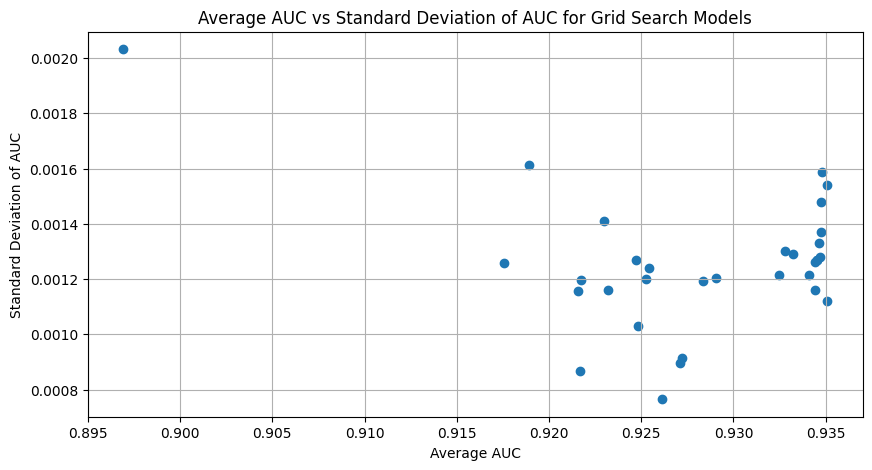

In [46]:
import matplotlib.pyplot as plt
# Calculate average and standard deviation of AUCs
results_df['Average AUC'] = results_df[['train_auc', 'test1_auc', 'test2_auc']].mean(axis=1)
results_df['Standard Deviation AUC'] = results_df[['train_auc', 'test1_auc', 'test2_auc']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(results_df['Average AUC'], results_df['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()


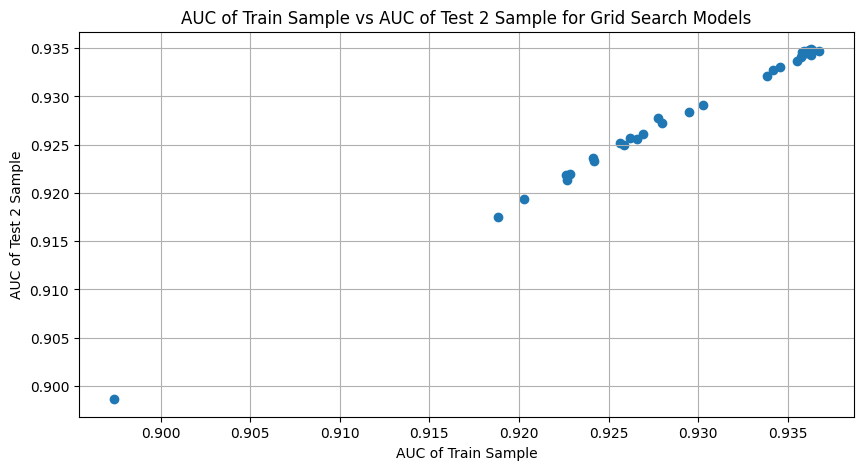

In [47]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(results_df['train_auc'], results_df['test2_auc'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()


1042/1042 [==============================] - 1s 750us/step


C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\847894129.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat = df.groupby("Score Bins")["Actual"].mean()


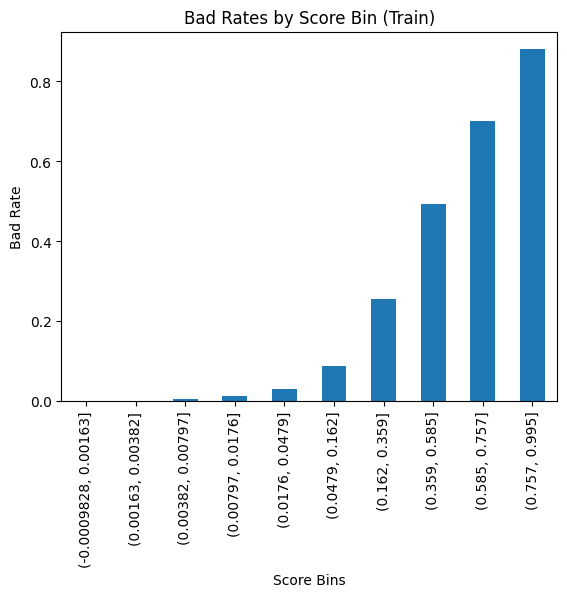

C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\847894129.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat = df.groupby("Score Bins")["Actual"].mean()


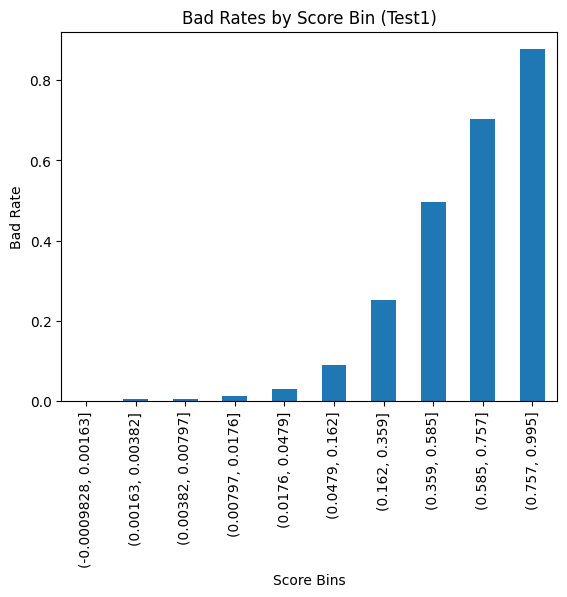

C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\847894129.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat = df.groupby("Score Bins")["Actual"].mean()


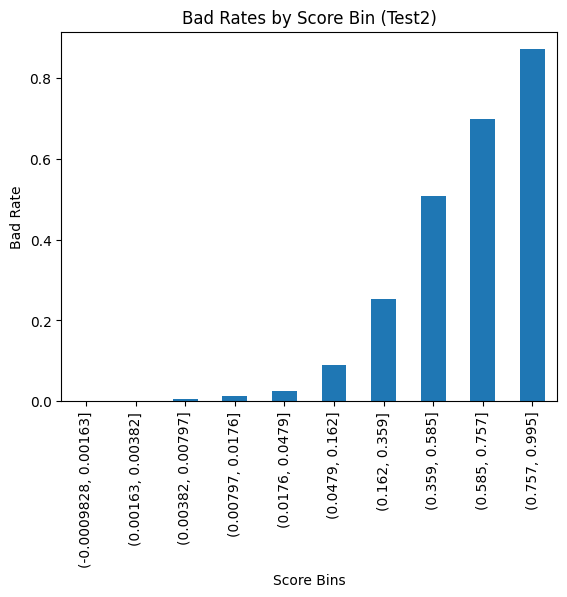

In [48]:
import matplotlib.pyplot as plt

# Compute predicted probabilities
Y_train_pred = model.predict(X3_train)
Y_test1_pred = model.predict(X3_test1)
Y_test2_pred = model.predict(X3_test2)

# Create score bins based on train sample predictions
quantiles = pd.qcut(Y_train_pred.flatten(), q=10, precision=3, retbins=True, duplicates='drop')[1]

# Function to compute bad rates and plot bar chart
def compute_bad_rates_and_plot(y_true, y_pred, quantiles, set_name):
    df = pd.DataFrame({"Actual": y_true, "Prediction": y_pred.flatten()})
    df["Score Bins"] = pd.cut(df["Prediction"], bins=quantiles, include_lowest=True)
    stat = df.groupby("Score Bins")["Actual"].mean()

    stat.plot(kind='bar', title=f'Bad Rates by Score Bin ({set_name})')
    plt.ylabel('Bad Rate')
    plt.show()

# Compute bad rates and plot bar chart for each set
compute_bad_rates_and_plot(Y_train, Y_train_pred, quantiles, 'Train')
compute_bad_rates_and_plot(Y_test1, Y_test1_pred, quantiles, 'Test1')
compute_bad_rates_and_plot(Y_test2, Y_test2_pred, quantiles, 'Test2')


In [49]:
def compute_bad_rates(y_true, y_pred, quantiles):
    # Create a DataFrame with the actual outcomes and predicted probabilities
    df = pd.DataFrame({'Actual': y_true, 'Prediction': y_pred.flatten()})

    # Apply the score bins to the DataFrame
    df['Score Bin'] = pd.cut(df['Prediction'], bins=quantiles, include_lowest=True)

    # Compute the bad rates in each bin
    df['Bad Rate'] = df.groupby('Score Bin')['Actual'].transform('mean')

    return df.drop_duplicates('Score Bin')

# Compute bad rates for each set
rank_order_train = compute_bad_rates(Y_train, Y_train_pred, quantiles)
rank_order_test1 = compute_bad_rates(Y_test1, Y_test1_pred, quantiles)
rank_order_test2 = compute_bad_rates(Y_test2, Y_test2_pred, quantiles)

print('Train Rank Ordering:')
print(rank_order_train)

Train Rank Ordering:
        Actual  Prediction              Score Bin  Bad Rate
15166        0    0.002720     (0.00163, 0.00382]  0.001736
59491        0    0.000867  (-0.0009828, 0.00163]  0.000643
83771        1    0.869952         (0.757, 0.995]  0.880658
94986        1    0.562433         (0.359, 0.585]  0.493699
28910        0    0.591919         (0.585, 0.757]  0.701453
18665        0    0.011386      (0.00797, 0.0176]  0.011831
118953       0    0.161594        (0.0479, 0.162]  0.088612
78723        0    0.030259       (0.0176, 0.0479]  0.029385
60685        0    0.282672         (0.162, 0.359]  0.256044
90812        0    0.004103     (0.00382, 0.00797]  0.004758


C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\191386303.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Bad Rate'] = df.groupby('Score Bin')['Actual'].transform('mean')
C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\191386303.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Bad Rate'] = df.groupby('Score Bin')['Actual'].transform('mean')
C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\191386303.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ado

In [50]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_train)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_train, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


4860/4860 [==============================] - 3s 707us/step
                      sum  count  Bad Rate
Score Bins                                
(0.0, 0.00163]         10  15552  0.000643
(0.00163, 0.00382]     27  15552  0.001736
(0.00382, 0.00797]     74  15552  0.004758
(0.00797, 0.0176]     184  15552  0.011831
(0.0176, 0.0479]      457  15552  0.029385
(0.0479, 0.162]      1378  15551  0.088612
(0.162, 0.359]       3982  15552  0.256044
(0.359, 0.585]       7678  15552  0.493699
(0.585, 0.757]      10909  15552  0.701453
(0.757, 1.0]        13696  15552  0.880658


C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\727000187.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])


In [51]:
stat_nn = stat_nn.reset_index()


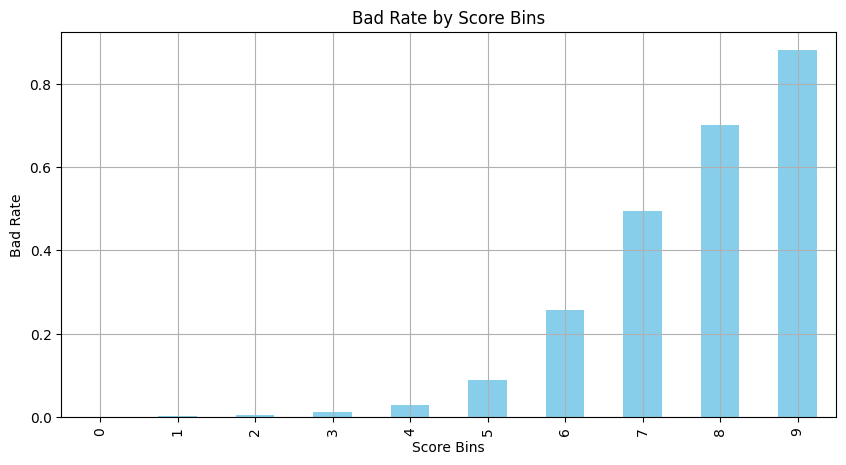

In [52]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


In [53]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_test1)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_test1, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


1042/1042 [==============================] - 1s 681us/step
                     sum  count  Bad Rate
Score Bins                               
(0.0, 0.00168]         2   3333  0.000600
(0.00168, 0.00385]    17   3333  0.005101
(0.00385, 0.00816]    18   3332  0.005402
(0.00816, 0.0184]     44   3333  0.013201
(0.0184, 0.0503]     107   3332  0.032113
(0.0503, 0.172]      315   3333  0.094509
(0.172, 0.365]       857   3332  0.257203
(0.365, 0.586]      1675   3333  0.502550
(0.586, 0.753]      2332   3332  0.699880
(0.753, 1.0]        2921   3333  0.876388


C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\3716452645.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])


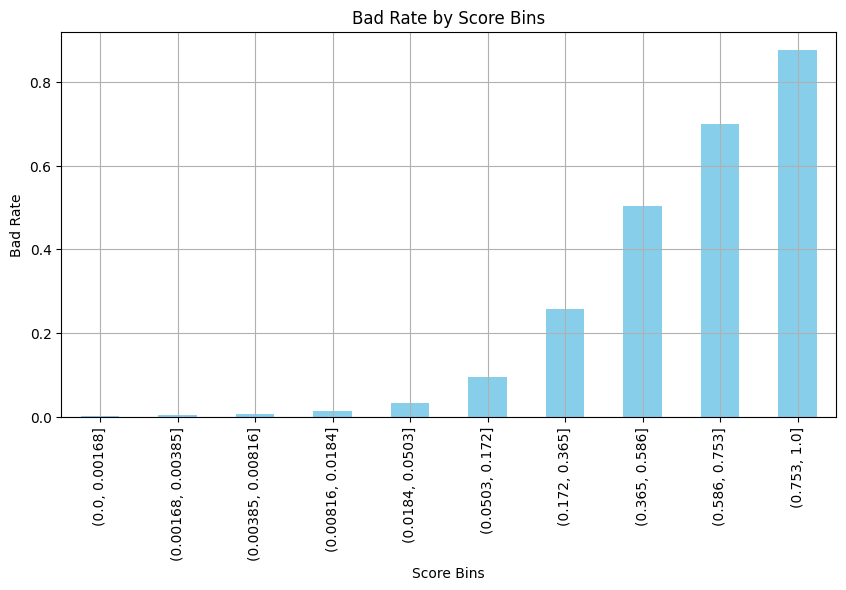

In [54]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


In [56]:
# Predict default probabilities on test set
X3_test1 = X3_test1[X3_train.columns]
predicted_default = model.predict(X3_test1).flatten()  # Changed line
X3_test1['predicted_default'] = predicted_default
X3_test1 = X3_test1.assign(target = Y_test1.values)
print(X3_test1.columns)
# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()
    
    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_1"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    
    return portfolio_default_rate, portfolio_expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = calculate_metrics(X3_test1, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


1042/1042 [==============================] - 2s 2ms/step
Index(['B_1', 'B_11', 'B_16', 'B_18', 'B_2', 'B_24', 'B_3', 'B_36', 'B_37',
       'B_38_2.0', 'B_38_3.0', 'B_38_4.0', 'B_4', 'B_5', 'B_7', 'B_8', 'B_9',
       'D_112', 'D_127', 'D_130', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45',
       'D_48', 'D_49', 'D_50', 'D_51', 'D_53', 'D_54', 'D_63_CO', 'D_63_CR',
       'D_64_O', 'D_66_1.0', 'D_68_2.0', 'D_75', 'D_77', 'D_79', 'P_2', 'R_1',
       'R_12', 'R_2', 'R_26', 'R_27', 'R_3', 'S_3', 'S_7', 'predicted_default',
       'target'],
      dtype='object')
Threshold: 0.1, Default Rate: 0.01729694886119467, Expected Revenue: -2006.579885491019
Threshold: 0.2, Default Rate: 0.027346998679125288, Expected Revenue: -2011.946767290418
Threshold: 0.3, Default Rate: 0.045299298939421175, Expected Revenue: -1960.6659265154785
Threshold: 0.4, Default Rate: 0.06519091023648507, Expected Revenue: -1869.6504860714979
Threshold: 0.5, Default Rate: 0.0880266339027387, Expected Revenue: -1781.460007083

C:\Users\Maniv\AppData\Local\Temp\ipykernel_22996\463546196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3_test1['predicted_default'] = predicted_default


In [57]:
# Generate predicted default probabilities
predicted_default = model.predict(X3_train).flatten()
df["predicted_default"] = pd.Series(predicted_default)

print(df)
# Divide df based on date
df_may17_jan18 = df[(df['S_2'] >= '2017-05-01') & (df['S_2'] <= '2018-01-31')]
df_mar17_apr17 = df[(df['S_2'] >= '2017-03-01') & (df['S_2'] <= '2017-04-30')]
df_feb18_mar18 = df[(df['S_2'] >= '2018-02-01') & (df['S_2'] <= '2018-03-31')]

# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(df_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = calculate_metrics(df_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = calculate_metrics(df_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

df_may17_jan18=df_may17_jan18.fillna(0)
df_mar17_apr17=df_mar17_apr17.fillna(0)
df_feb18_mar18=df_feb18_mar18.fillna(0)


4860/4860 [==============================] - 9s 2ms/step
                                              customer_ID        S_2  \
0       ce104d51cb4b141f0a4a8fc78b99de6246da712f660535... 2018-01-10   
1       ce104d51cb4b141f0a4a8fc78b99de6246da712f660535... 2017-03-13   
2       ce104d51cb4b141f0a4a8fc78b99de6246da712f660535... 2017-09-15   
3       ce104d51cb4b141f0a4a8fc78b99de6246da712f660535... 2017-05-22   
4       3fb0baf28cd4665064c74b515487bc43ab353360d443d2... 2018-01-21   
...                                                   ...        ...   
222166  6b5ea1be38dffa2387ec3902a038dadd71ee10488b59bd... 2017-05-04   
222167  984683ba0c32599624d2a89f3ff7f4e39f08f40374e54a... 2017-07-26   
222168  2347dba4f7604fb3a9e2ee0d50e12f1ad8a5f7374f8ad9... 2017-07-05   
222169  6de5c633221996e5d9a9b9b472f10554ceabac87ed81c6... 2018-03-28   
222170  266d6718c17255da13908cfc473fbb99fb20799747e6df... 2018-01-25   

             P_2      D_39       B_1       B_2       R_1       S_3      D_41  

In [58]:
# Determine the number of customers in each period
num_customers_may17_jan18 = df_may17_jan18.shape[0]
num_customers_mar17_apr17 = df_mar17_apr17.shape[0]
num_customers_feb18_mar18 = df_feb18_mar18.shape[0]

# Define the thresholds
thresholds = [0.1, 0.3]

for threshold in thresholds:
    print(f"Threshold: {threshold}")
    
    # Calculate default rate for each period
    default_rate_may17_jan18, _ = calculate_metrics(df_may17_jan18, threshold)
    default_rate_mar17_apr17, _ = calculate_metrics(df_mar17_apr17, threshold)
    default_rate_feb18_mar18, _ = calculate_metrics(df_feb18_mar18, threshold)
    
    # Calculate number of defaulted customers
    num_defaulted_may17_jan18 = round(default_rate_may17_jan18 * num_customers_may17_jan18)
    num_defaulted_mar17_apr17 = round(default_rate_mar17_apr17 * num_customers_mar17_apr17)
    num_defaulted_feb18_mar18 = round(default_rate_feb18_mar18 * num_customers_feb18_mar18)
    
    print(f"May 2017 - Jan 2018, Number of Defaulted Customers: {num_defaulted_may17_jan18}")
    print(f"March 2017 - April 2017, Number of Defaulted Customers: {num_defaulted_mar17_apr17}")
    print(f"February 2018 - March 2018, Number of Defaulted Customers: {num_defaulted_feb18_mar18}")


Threshold: 0.1
May 2017 - Jan 2018, Number of Defaulted Customers: 38345
March 2017 - April 2017, Number of Defaulted Customers: 7546
February 2018 - March 2018, Number of Defaulted Customers: 9434
Threshold: 0.3
May 2017 - Jan 2018, Number of Defaulted Customers: 38231
March 2017 - April 2017, Number of Defaulted Customers: 7552
February 2018 - March 2018, Number of Defaulted Customers: 9428


Here's what each entry means:
•	Default Rate: This is the percentage of customers who are predicted to default (i.e., fail to make required payments) under the current strategy. The higher the default rate, the more risky the strategy is, as it means a larger proportion of the customer base is expected to default.
•	Expected Revenue: This is the total revenue expected to be earned from the customers who are predicted not to default. This considers both the probability of non-default and the revenue from each customer.
For example, looking at the first line of the results:
•	At a threshold of 0.1 (a conservative strategy), between May 2017 and Jan 2018, the model predicts a default rate of about 60.62%. This means that it predicts about 60.62% of customers will default. Meanwhile, the expected revenue from customers who don't default is estimated to be around 16.52 (presumably in some units of currency, such as thousands or millions of dollars).
As we increase the threshold, the model becomes more aggressive, accepting customers with higher predicted default probabilities. This is why the default rate increases with the threshold.
Interestingly, for each period, the default rate seems to stabilize beyond a threshold of 0.5. This might suggest that for this particular dataset and model, increasing the threshold beyond 0.5 doesn't lead to accepting significantly more risky customers. This could be due to characteristics of the dataset or the specific implementation of the model.

